In [ ]:
!pip install astropy
!pip install sep

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


import numpy and sep

In [1]:
import numpy as np
import sep

additional setup for reading the test image and displaying plots

In [2]:
import astropy.io
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [3]:
data = astropy.io.fits.getdata("image.fits")

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
[W 2024-12-08 15:35:23,271.271 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992               
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]
[W 2024-12-08 15:35:23,277.277 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC      
[W 2024-12-08 15:35:23,280.280 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:09> EXPO EMM

show the image

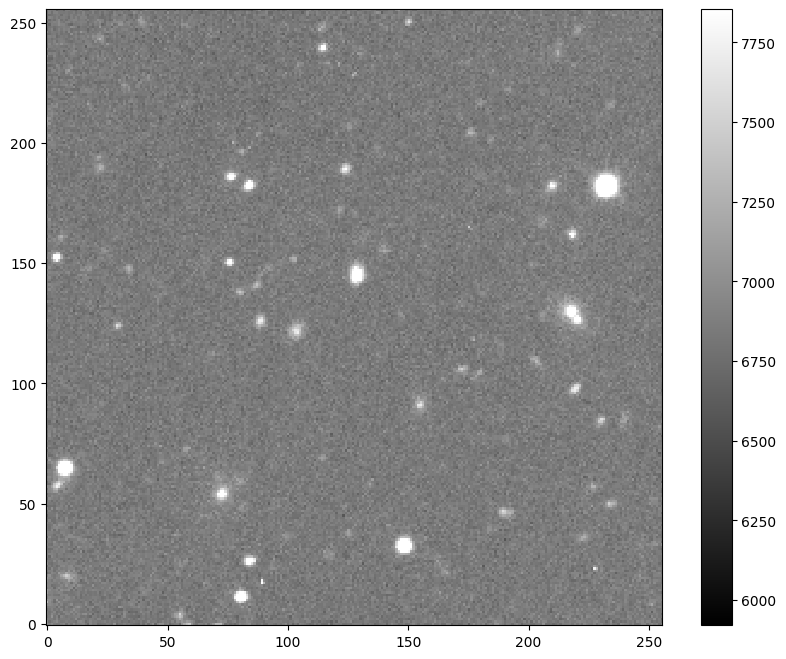

In [4]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('tutorialdata.png')

measure a spatially varying background on the image

In [5]:
bkg = sep.Background(data)

evaluate background as 2-d array, same size as original image

In [6]:
bkg_image = bkg.back()
# bkg_image = np.array(bkg) #equivalent to above

show the background

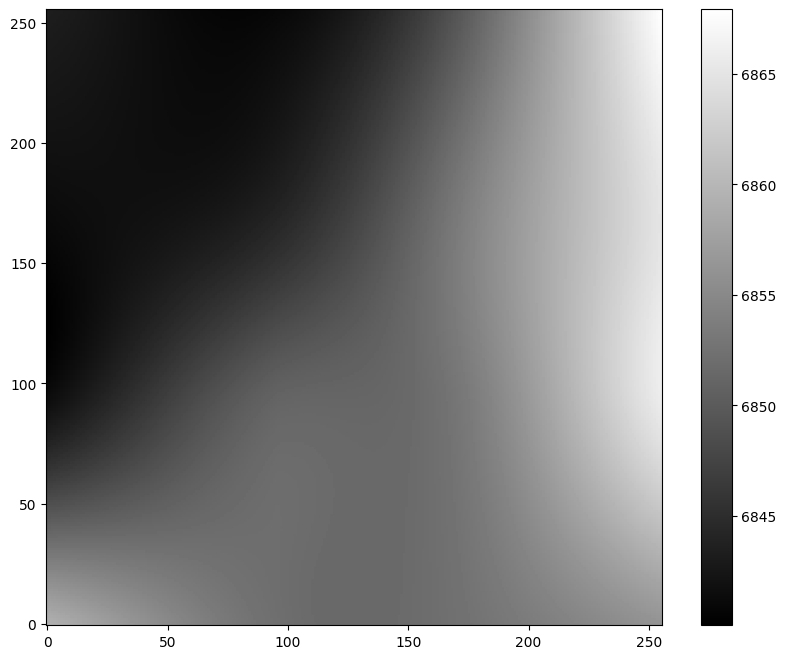

In [7]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('2darray1.png')

evaluate the background noise as 2-d array, same size as og image

In [8]:
bkg_rms = bkg.rms()

show background noise

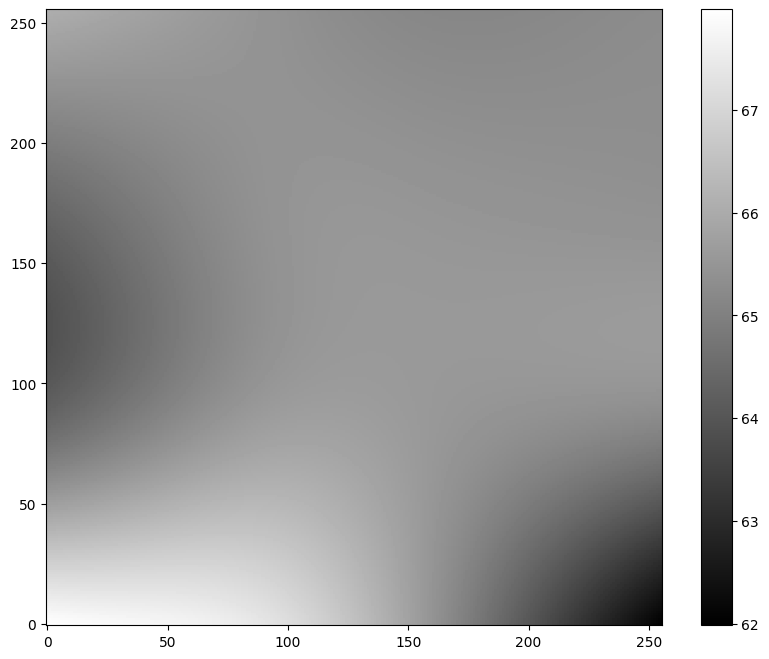

In [9]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('bkgnoise1.png')

subtract the background

In [14]:
data_sub = data - bkg

In [15]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

how many objects were detected

In [16]:
len(objects)

69

plot background-subtracted image and plot an ellipse for each object

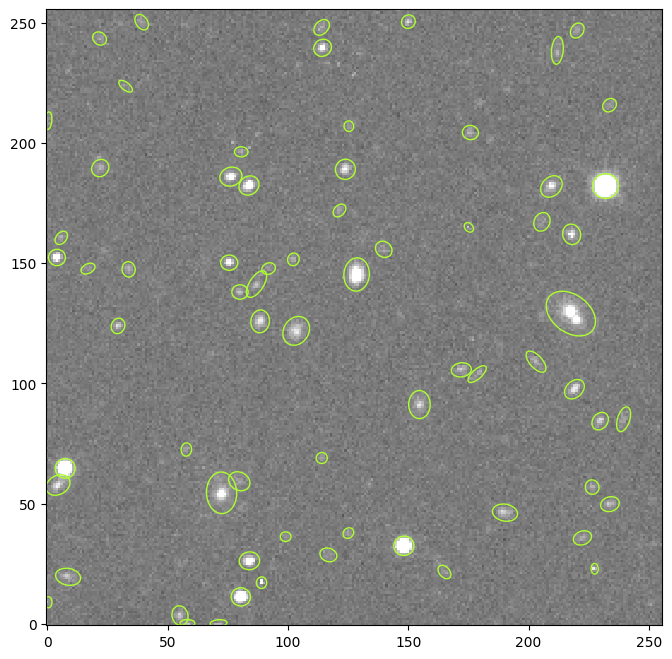

In [17]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('greenyellow')
    ax.add_artist(e)
plt.savefig('ellipse1.png')